# Project 2 - Build a Traffic Sign Recognition Classifier

---

## Self-Driving Car Engineer Nanodegree
## Deep Learning

---

### Author: Tom Chmielenski
### Date: 8/2017

---



## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


In [1]:
# DEBUG - show CPUs/GPUs available

from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

def get_available_cpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'CPU']

print ("CPUs available")
print(get_available_cpus())
print ("GPUs available")
print(get_available_gpus())

CPUs available
['/cpu:0']
GPUs available
['/gpu:0']


---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
from os import path

# TODO: Fill this in based on where you saved the training and testing data
training_file = "dataset/train.p"
validation_file= "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# if you don't have a good validation set, you can split off 20% (good rule of thumb) of the training set!
#from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2,  random_state=0)
#print ("Update Image Shape: ()".format(X_train[0].shape))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
#from numpy import genfromtxt
#signnames = genfromtxt('signnames.csv', delimiter=',')

import pandas as pd
signnames = pd.read_csv('signnames.csv');
n_classes = len(signnames)


assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(image_shape))
print("Training Set:   {} images".format(n_train))
print("Validation Set: {} images".format(n_valid))
print("Test Set:       {} images".format(n_test))
print()
print("Number of classes =", n_classes)
print()
print(signnames)
print()



Image Shape: (32, 32, 3)
Training Set:   34799 images
Validation Set: 4410 images
Test Set:       12630 images

Number of classes = 43

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                 

### Include an exploratory visualization of the dataset


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

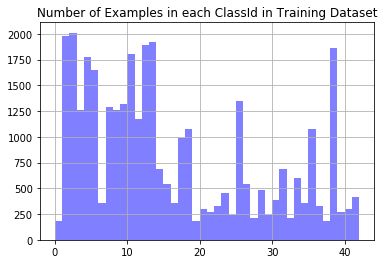

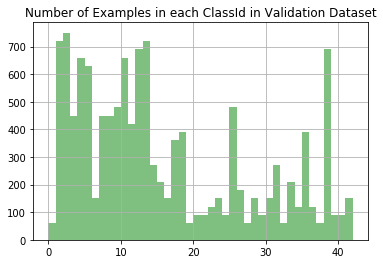

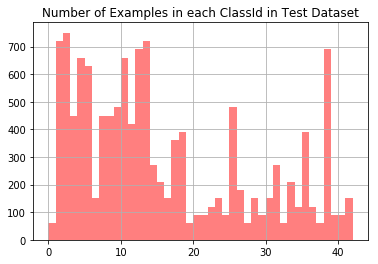

In [5]:
n, bins, patches = plt.hist(y_train, np.max(y_train), facecolor='blue', alpha=0.5)
plt.title("Number of Examples in each ClassId in Training Dataset")
plt.grid(True)
plt.savefig('output/num_examples_in_training.png')
plt.show()

n, bins, patches = plt.hist(y_test, np.max(y_test), facecolor='green', alpha=0.5)
plt.title("Number of Examples in each ClassId in Validation Dataset")
plt.grid(True)
plt.savefig('output/num_examples_in_validation.png')
plt.show()

n, bins, patches = plt.hist(y_test, np.max(y_test), facecolor='red', alpha=0.5)
plt.title("Number of Examples in each ClassId in Test Dataset")
plt.grid(True)
plt.savefig('output/num_examples_in_test.png')
plt.show()

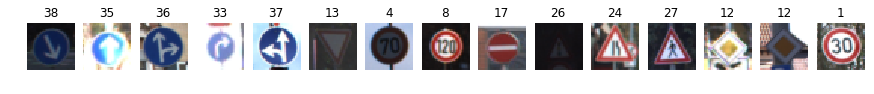

In [6]:
# show an random sampling of the image we are working with.

import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline


def showImagesHorizontally(images, labels, number_to_display):
    fig = plt.figure(figsize=(15,15))
    for i in range(number_to_display):
        a=fig.add_subplot(1,number_to_display,i+1)
        index = random.randint(0, len(images))
        image = images[index].squeeze()
        a.set_title(labels[index])
        a.imshow(image)
        a.axis('off')
        
showImagesHorizontally(X_train, y_train, 15)

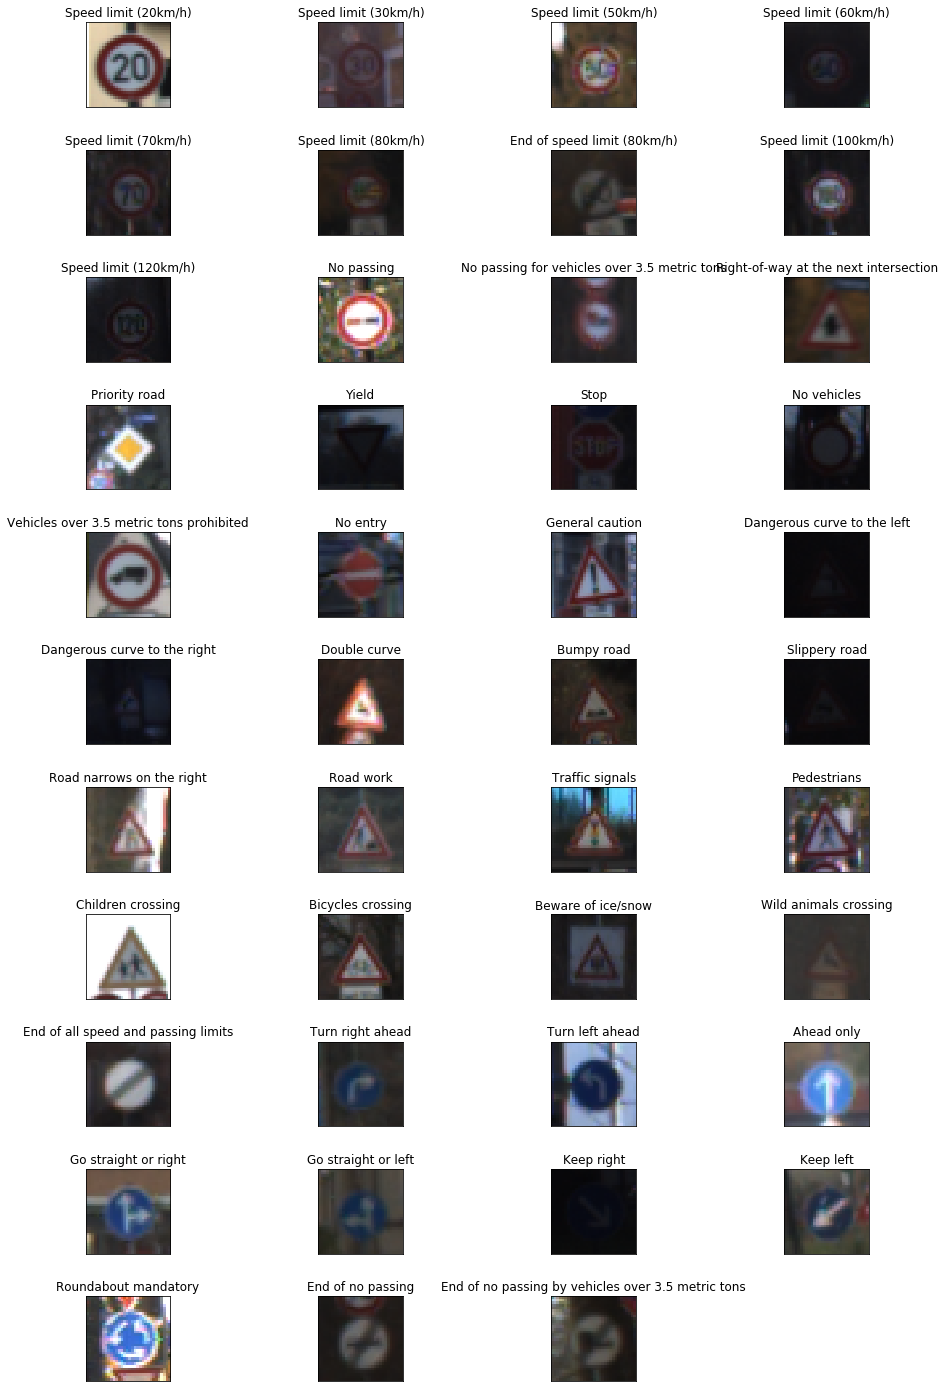

In [7]:
# Display an image from each class
import matplotlib.pyplot as plt

sample_images=[]
plt.figure(figsize=(16, 25))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    first_img = X_train[y_train == i]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(first_img[0,:,: :])
    plt.title(signnames.SignName.iloc[i])
    plt.subplots_adjust(hspace=.5)
    sample_images.append(first_img)

plt.savefig('output/sample_of_class_images.png')
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

This project was originally adapted from [Udacity's Self Driving Car, Term 1, LeNet Lab](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/73a0dca7-b71f-4e28-907c-28cab49a7b03).

I will begin as suggested by using the LeNet architecture as shown below.  However, we will replace the subsampling layers will be replaced with pooling layers.

![LeNet Architecture](lenet.png)
Source: Yan LeCun


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import cv2
#from numpy import newaxis
import numpy as np

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    #return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def grayscale_all(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
    return np.array(gray_images)

def better_normalize (image):
    return np.array(image / 255.0 - 0.5 )

def normalize (image):
    return (image -128) / 128
    
gray_X_train = grayscale_all(X_train)
gray_X_train = gray_X_train[..., np.newaxis]
norm_gray_X_train = better_normalize(gray_X_train)

gray_X_test = grayscale_all(X_test)
gray_X_test = gray_X_test[..., np.newaxis]
norm_gray_X_test = better_normalize(gray_X_test)

gray_X_valid = grayscale_all(X_valid)
gray_X_valid = gray_X_valid[..., np.newaxis]
norm_gray_X_valid = better_normalize(gray_X_valid)


In [9]:
print ("X_train: ")
print ("  After:   ", np.mean(norm_gray_X_train))
print ("  Before:  ", np.mean(X_train))
print ("X_test: ")
print ("  After:   ", np.mean(norm_gray_X_test))
print ("  Before:  ", np.mean(X_test))

X_train: 
  After:    -0.178755927357
  Before:   82.677589037
X_test: 
  After:    -0.181264769801
  Before:   82.1484603612


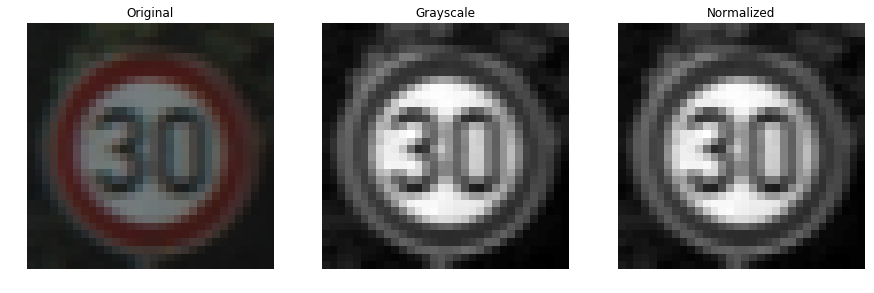

In [10]:
# Display an image before and after grayscale, and normalizing
import matplotlib.pyplot as plt

index = 2398

fig = plt.figure(figsize=(15,15))

a=fig.add_subplot(1,3,1)
image = X_train[index].squeeze()
a.set_title("Original")
a.imshow(image)
a.axis('off')

b=fig.add_subplot(1,3,2)
image = gray_X_train[index].squeeze()
b.set_title("Grayscale")
b.imshow(image, cmap='gray')
b.axis('off')

c=fig.add_subplot(1,3,3)
image = norm_gray_X_train[index].squeeze()
c.set_title("Normalized")
c.imshow(image , cmap='gray')
c.axis('off')

plt.savefig('output/image_preprocessing.png')
plt.show()



In [11]:
#  Reuse original variables after preprocessing
X_train = norm_gray_X_train
X_test = norm_gray_X_test
X_valid = norm_gray_X_valid

print("shape =", X_train.shape)

shape = (34799, 32, 32, 1)


# Display an image before and after grayscale, and normalizing
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 25))

sampleImageIndex = 1

plt.subplot(11, 3, 1)
first_img = X_train[sampleImageIndex]
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(first_img[0,:,: :])
plt.title("Original Image")
plt.subplots_adjust(hspace=.5)

plt.subplot(11, 3, 2)
first_img = X_train[sampleImageIndex]
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(first_img[0,:,: :])
plt.title("Grayscale Image", cmap='gray')
plt.subplots_adjust(hspace=.5)

plt.subplot(11, 3, 3)
first_img = X_train[sampleImageIndex]
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(first_img[0,:,: :])
plt.title("Normalized Image", cmap='gray')
plt.subplots_adjust(hspace=.5)

plt.savefig('output/image_preprocessing.png')
plt.show()


## Preprocess Data

Shuffle the training data.

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [13]:
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128

## Modified LeNet Architecture used
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32x1 image as input

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** ReLu

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** ReLu.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you. 400 outputs.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** ReLu

**DropOut.** keep_prod = 0.5

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Relu

**DropOut.** keep_prod = 0.5

**Layer 5: Fully Connected (Logits).** This should have 43 outputs, as we have 43 classes of signs.

### Output
Return the result of the 2nd fully connected layer.

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout - prevents overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout - prevents overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify German Traffic Sign Dataset

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [15]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify German Traffic Sign data.

You do not need to modify this section.

In [16]:
rate = 0.00125

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [17]:
# modified version to retun loss as well
#   https://discussions.udacity.com/t/validation-accuracy-too-small/231821/51

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [18]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

validation_accuracies = []
validation_losses = []
training_accuracies = []
training_losses = []
    
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_loss, training_accuracy = evaluate(X_train, y_train)
        training_losses.append(training_loss)
        training_accuracies.append(training_accuracy)
        
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        validation_losses.append(validation_loss)
        validation_accuracies.append(validation_accuracy)
        
        # Print cost and validation accuracy of an epoch
        #print_epoch_stats(i, sess, batch_x, batch_y)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

Training...

EPOCH 1 ...
Training Accuracy = 0.690
Validation Accuracy = 0.649

EPOCH 2 ...
Training Accuracy = 0.878
Validation Accuracy = 0.823

EPOCH 3 ...
Training Accuracy = 0.918
Validation Accuracy = 0.866

EPOCH 4 ...
Training Accuracy = 0.940
Validation Accuracy = 0.885

EPOCH 5 ...
Training Accuracy = 0.955
Validation Accuracy = 0.917

EPOCH 6 ...
Training Accuracy = 0.967
Validation Accuracy = 0.938

EPOCH 7 ...
Training Accuracy = 0.973
Validation Accuracy = 0.932

EPOCH 8 ...
Training Accuracy = 0.979
Validation Accuracy = 0.939

EPOCH 9 ...
Training Accuracy = 0.982
Validation Accuracy = 0.938

EPOCH 10 ...
Training Accuracy = 0.984
Validation Accuracy = 0.947

EPOCH 11 ...
Training Accuracy = 0.987
Validation Accuracy = 0.946

EPOCH 12 ...
Training Accuracy = 0.988
Validation Accuracy = 0.951

EPOCH 13 ...
Training Accuracy = 0.990
Validation Accuracy = 0.955

EPOCH 14 ...
Training Accuracy = 0.990
Validation Accuracy = 0.954

EPOCH 15 ...
Training Accuracy = 0.990
Valid

In [19]:
print("Epochs - {}".format(EPOCHS))
print("Batch Size  - {}".format(BATCH_SIZE ))
print("Rate - {:.5f}.".format(rate))


Epochs - 40
Batch Size  - 128
Rate - 0.00125.


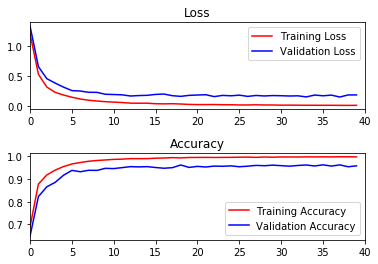

In [20]:
import matplotlib.pyplot as plt

# training vs validation loss and Accuracy Plots
# use same colors as others (red, blue)
loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(training_losses,'r', label='Training Loss')
loss_plot.plot(validation_losses, 'b', label='Validation Loss')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=1)
    
acc_plot = plt.subplot(2,1,2)
acc_plot.set_title('Accuracy')
acc_plot.plot(training_accuracies,'r', label='Training Accuracy')
acc_plot.plot(validation_accuracies, 'b', label='Validation Accuracy')
acc_plot.set_xlim([0, EPOCHS])
acc_plot.legend(loc=4)
plt.subplots_adjust(hspace=.5)
plt.savefig('output/final_training_vs_accuracy_plots.png')

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [21]:
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.934


In [22]:
print("Training Set Accuracy    - {:.3f}".format(training_accuracies[EPOCHS-1]))
print("Validation Set Accuracy  - {:.3f}".format(validation_accuracies[EPOCHS-1]))
print("Test Accuracy            - {:.3f}".format(test_accuracy))

Training Set Accuracy    - 0.998
Validation Set Accuracy  - 0.958
Test Accuracy            - 0.934


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [23]:
def better_normalize (image):
    return np.array(image / 255.0 - 0.5 )

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    #return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale_all(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
    return np.array(gray_images)


### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

### Plot the images to be tested

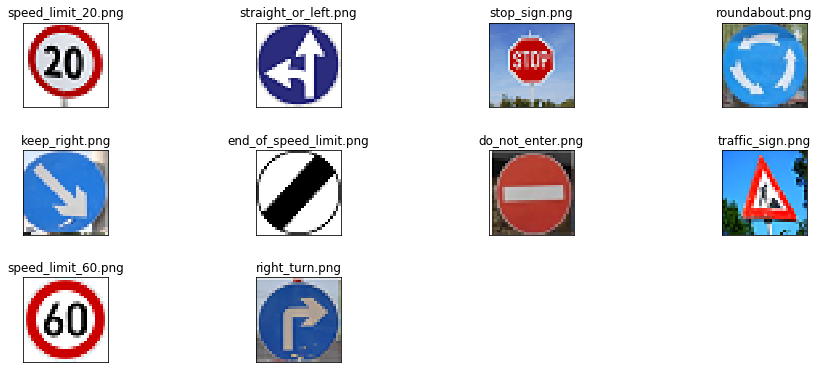

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from glob import glob
import cv2
import os

new_image_dir = "new_traffic_signs/*.png"
image_filenames = glob(new_image_dir) 
print()

new_images=[]
plt.figure(figsize=(16, 25))
for i, image_filename in enumerate(image_filenames):
    plt.subplot(11, 4, i+1)
    image = mpimg.imread(image_filename, cv2.IMREAD_UNCHANGED)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(image)
    plt.title(os.path.basename(image_filenames[i]))
    plt.subplots_adjust(hspace=.5)
    new_images.append(image)
plt.show()
plt.savefig('output/new_traffic_signs.png')

In [25]:
# convert new images to grayscale and normalize
gray_new_images = grayscale_all(new_images)
gray_new_images = gray_new_images[..., np.newaxis]
norm_new_images = better_normalize(gray_new_images)
print("norm_new_images.shape = {}".format(norm_new_images.shape))

norm_new_images.shape = (10, 32, 32, 1)


### Run the predictions here and use the model to output the prediction for each image.
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [26]:
new_images_labels =[0, 37, 14, 40, 38, 32, 17, 25, 3, 33]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_images_loss, new_images_accuracy = evaluate(norm_new_images, new_images_labels)
    print("Test Accuracy = {:.3f}".format(new_images_accuracy))
    

Test Accuracy = 0.700


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    softmax = tf.nn.softmax(logits)
    prob = sess.run(softmax, feed_dict = {x: norm_new_images, y: new_images_labels, keep_prob:1.0 })
    top_5_predict = sess.run(tf.nn.top_k(prob, k=5))
                  
print (top_5_predict)        
                  



TopKV2(values=array([[  5.62149405e-01,   4.25716221e-01,   1.14720855e-02,
          4.98212234e-04,   1.61926117e-04],
       [  9.99824822e-01,   1.36584655e-04,   2.85309488e-05,
          9.10518702e-06,   5.96828386e-07],
       [  8.55992973e-01,   1.43401414e-01,   6.05420268e-04,
          1.22301913e-07,   3.45648736e-08],
       [  9.98490334e-01,   9.92675778e-04,   3.98693781e-04,
          3.45066655e-05,   2.47792177e-05],
       [  1.00000000e+00,   1.84328657e-21,   7.72751281e-25,
          1.95171102e-27,   4.84503187e-29],
       [  9.98577237e-01,   1.42250618e-03,   2.72396846e-07,
          2.14435953e-08,   3.53758277e-12],
       [  1.00000000e+00,   3.00037972e-09,   1.66112020e-11,
          8.37677150e-13,   5.48076883e-13],
       [  9.99989390e-01,   9.77341188e-06,   8.63171636e-07,
          7.44479411e-09,   5.52154766e-09],
       [  1.00000000e+00,   6.69480604e-09,   3.84358696e-13,
          1.41048522e-21,   9.78174497e-22],
       [  1.00000000e+0

In [93]:
import pandas as pd
import numpy as np
import ntpath

#    ClassId, SignName
signnames = pd.read_csv('signnames.csv', dtype = {'ClassId': int,'SignName': str})
#    class_id, image_name
new_signs = pd.read_csv('new_traffic_signs/new_traffic_signs.csv', dtype={'image_name': str, 'class_id': int})

def get_class_name(classId):
    return (signnames.ix[classId, "SignName"])

def get_actual_id(image_name):
    return new_signs.loc[0][new_signs['image_name'] == image_name, 'class_id']


# use image_filenames as this is the order the signs were predicted
for i in range(0, len(image_filenames)):
    i1 = i+1
    print("new image: %d" %i1)
    basename = ntpath.basename(image_filenames[i])
    print("  filename = %s" %basename)
    print("  class = %d : %s" %(new_images_labels[i], get_class_name(new_images_labels[i])))
    print()
    print("  predictions:")
    for j in range(0,5):
        predictedId = top_5_predict.indices[i][j]
        predictedProb = top_5_predict.values[i][j]
        #print(predictedId)   
        print("    %d: %2d : %s %5.3f" %(j, predictedId, get_sign_name(predictedId), predictedProb))
    
    print()
    print()
    

    

new image: 1
  filename = speed_limit_20.png
  class = 0 : Speed limit (20km/h)

  predictions:
    0: 38 : Keep right 0.562
    1:  3 : Speed limit (60km/h) 0.426
    2: 29 : Bicycles crossing 0.011
    3:  5 : Speed limit (80km/h) 0.000
    4: 34 : Turn left ahead 0.000


new image: 2
  filename = straight_or_left.png
  class = 37 : Go straight or left

  predictions:
    0: 37 : Go straight or left 1.000
    1:  0 : Speed limit (20km/h) 0.000
    2: 40 : Roundabout mandatory 0.000
    3: 18 : General caution 0.000
    4:  1 : Speed limit (30km/h) 0.000


new image: 3
  filename = stop_sign.png
  class = 14 : Stop

  predictions:
    0: 12 : Priority road 0.856
    1:  9 : No passing 0.143
    2: 13 : Yield 0.001
    3:  3 : Speed limit (60km/h) 0.000
    4: 33 : Turn right ahead 0.000


new image: 4
  filename = roundabout.png
  class = 40 : Roundabout mandatory

  predictions:
    0: 12 : Priority road 0.998
    1: 38 : Keep right 0.001
    2: 32 : End of all speed and passing limi

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

Note: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to \n", "File -> Download as -> HTML (.html). Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")